
# About Dataset
**Description:**
This dataset contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer-valued from 0 (no presence) to 4.

**Objective:**
Understand the Dataset & cleanup (if required).
Build classification models to predict whether or not the patients have Heart Disease.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms

**The Features is:**
1.   age
2.   sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


## Importing Libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

## Loading data

In [3]:
df = pd.read_csv('/content/Heart.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
df.tail()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [6]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [7]:
# 'Unnamed: 0' is an automatically generated column, likely from the index in the original file.
# We will drop it since it's unnecessary for our analysis.

df = pd.read_csv('/content/Heart.csv', index_col=0)

In [8]:
df


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


## Data Cleaning  & Data Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [10]:
print('The Shape Of Data Is ==> ', df.shape)

The Shape Of Data Is ==>  (303, 14)


In [11]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [12]:
df.describe(include = 'object')

,ChestPain,Thal,AHD
count,303,301,303
unique,4,3,2
top,asymptomatic,normal,No
freq,144,166,164


In [13]:
## printing total numbers of Unique value in the dataframe.

df.nunique()

,0
Age,41
Sex,2
ChestPain,4
RestBP,50
Chol,152
Fbs,2
RestECG,3
MaxHR,91
ExAng,2
Oldpeak,40


In [14]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [15]:
df['Thal'].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [16]:
df['AHD'].unique()


array(['No', 'Yes'], dtype=object)

In [17]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [18]:
# Create an imputer for numerical column Ca
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')

# Apply the imputer to the 'Ca' column
df['Ca'] = imputer_num.fit_transform(df[['Ca']])


In [19]:
# Filling NaN values in 'Thal' with the most frequent value

df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])


In [20]:
df['Thal'].unique()


array(['fixed', 'normal', 'reversable'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'ChestPain' column
df['ChestPain'] = le.fit_transform(df['ChestPain'])
# Apply Label Encoding to 'Thal' column
df['Thal'] = le.fit_transform(df['Thal'])

In [22]:
df['AHD'] = df['AHD'].replace(['No','Yes'], [0, 1])


In [23]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


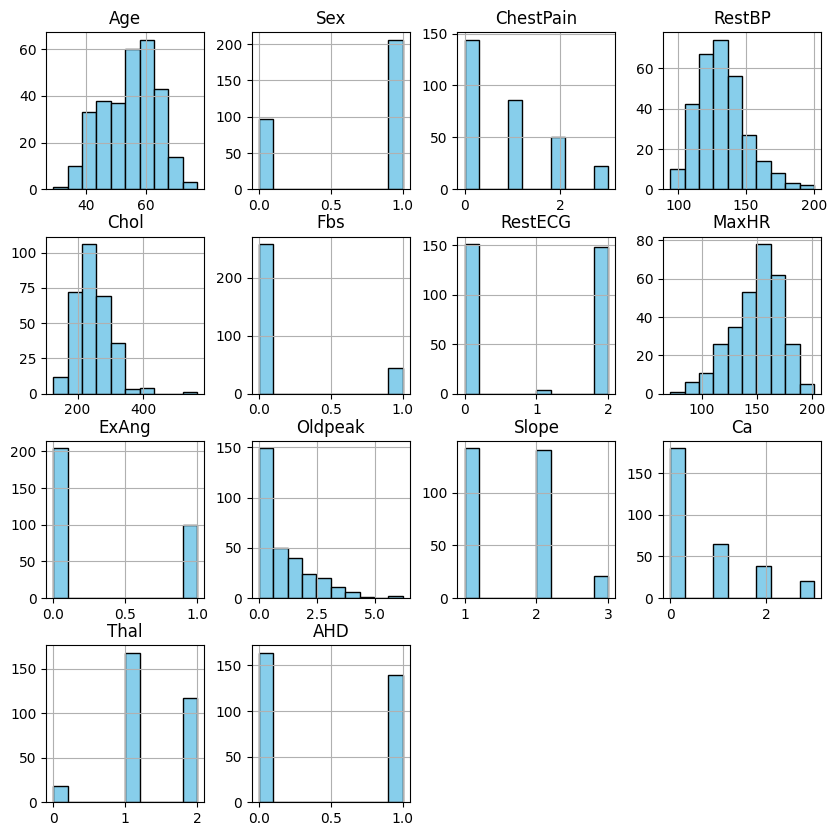

In [24]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10) , color='skyblue', edgecolor='black')
plt.show()


In [25]:
df.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,0.841584,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,1.326733,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.583020,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


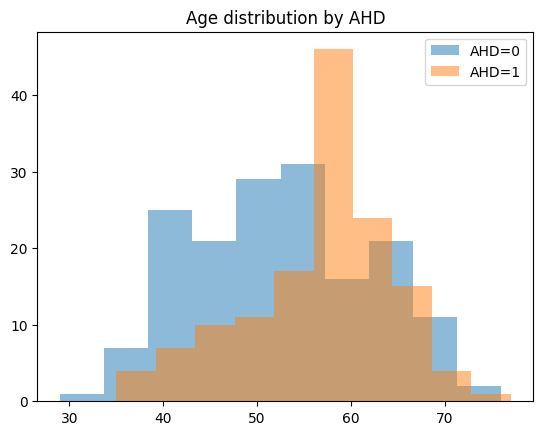

In [26]:
for target in [0, 1]:
    subset = df[df['AHD'] == target]
    plt.hist(subset['Age'], bins=10, alpha=0.5, label=f'AHD={target}')

plt.legend()
plt.title('Age distribution by AHD')
plt.show()


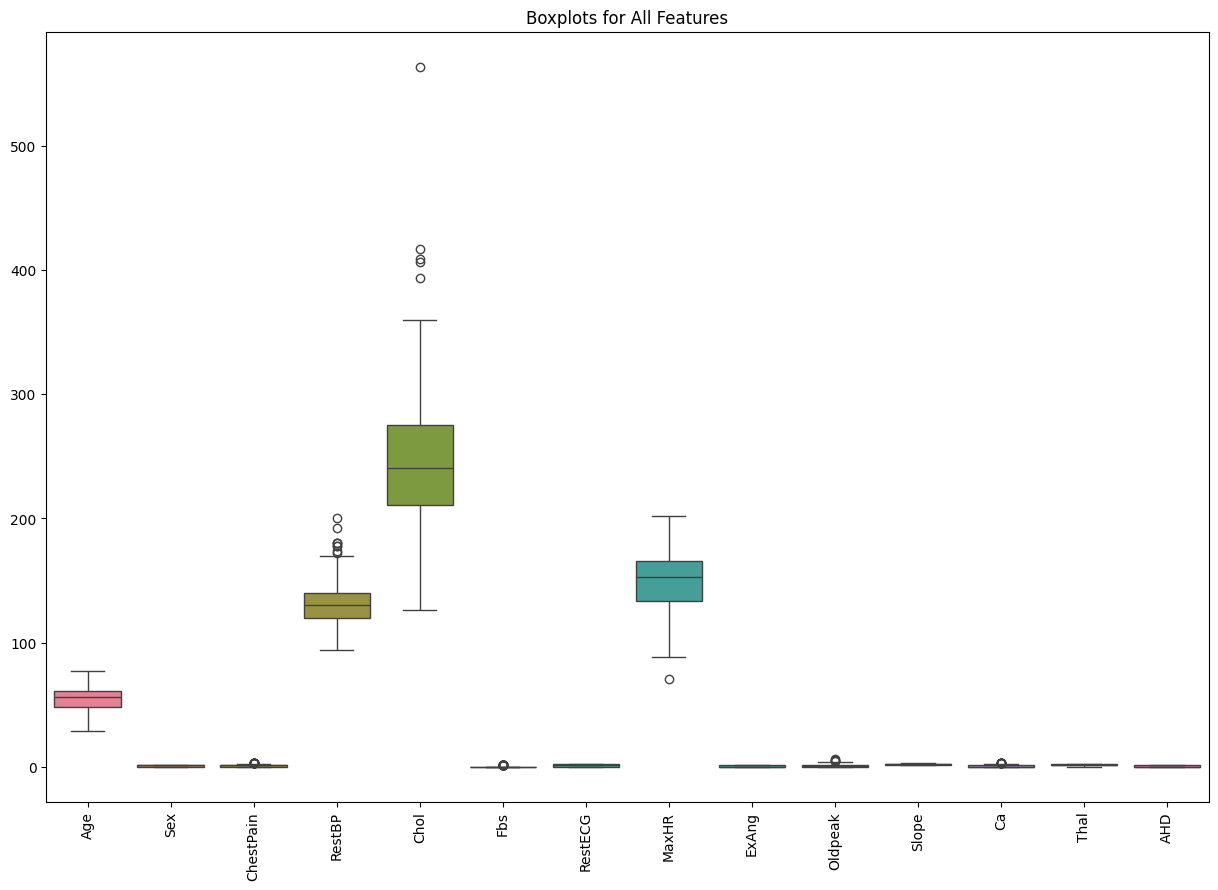

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplots for All Features')
plt.show()

In [28]:
corr_matrix= df.corr()
corr_matrix

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Age,1.000000,-0.097542,-0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.062549,0.223120
Sex,-0.097542,1.000000,-0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.215039,0.276816
ChestPain,-0.104139,-0.010084,1.000000,0.036077,-0.072319,0.039975,-0.067505,0.334422,-0.384060,-0.202277,-0.152050,-0.233117,-0.185251,-0.414446
RestBP,0.284946,-0.064456,0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.058317,0.150825
Chol,0.208950,-0.199915,-0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.083298,0.085164
Fbs,0.118530,0.047862,0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,-0.011209,0.025264
RestECG,0.148868,0.021647,-0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,-0.011529,0.169202
MaxHR,-0.393806,-0.048663,0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.114488,-0.417167
ExAng,0.091661,0.146201,-0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.225508,0.431894
Oldpeak,0.203805,0.102173,-0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.210236,0.424510


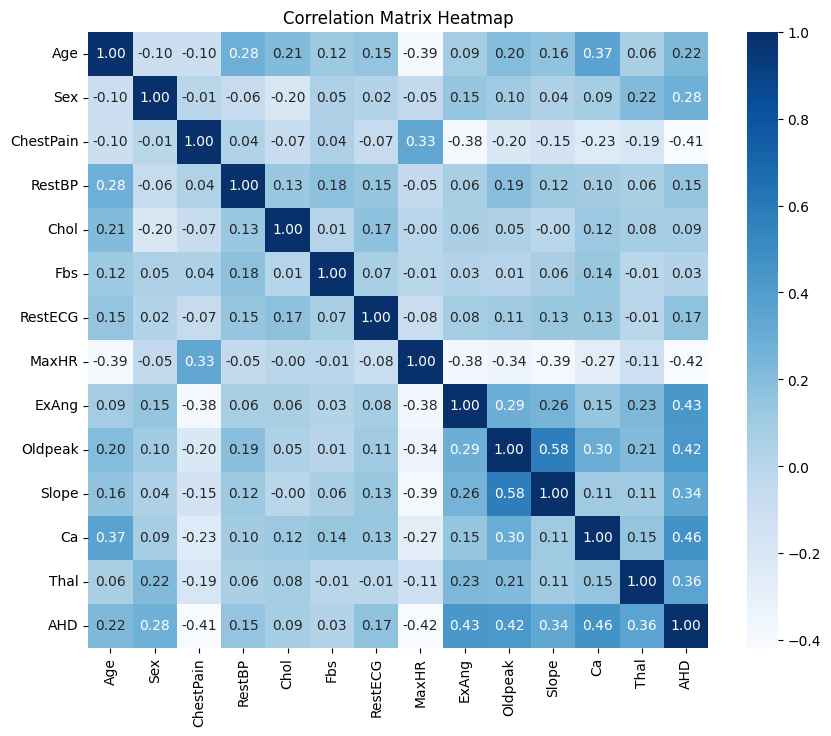

In [29]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


In [30]:
original_columns = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']
df = pd.DataFrame(df, columns=original_columns)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [31]:
X = df.drop(labels=["AHD"],axis=1)
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1


In [32]:
y = df[['AHD']]
y.head()

,AHD
1,0
2,1
3,1
4,0
5,0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# X

## model_1_LR

In [34]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
x1_train.shape, x1_test.shape , y1_train.shape, y1_test.shape

((242, 13), (61, 13), (242, 1), (61, 1))

In [36]:
y1_train, y1_test

(     AHD
 133    0
 203    0
 197    0
 76     0
 177    0
 ..   ...
 189    1
 72     1
 107    1
 271    1
 103    0
 
 [242 rows x 1 columns],
      AHD
 180    0
 229    1
 112    1
 247    1
 61     1
 ..   ...
 250    0
 105    1
 301    1
 194    1
 185    1
 
 [61 rows x 1 columns])

In [37]:
x1_train, x1_test

(array([[-2.81911474,  0.68620244,  1.20852121, ..., -0.97635214,
         -0.71113139, -0.5613414 ],
        [ 0.28381332,  0.68620244,  0.16526786, ..., -0.97635214,
          0.36087264,  1.15670349],
        [ 1.61363963,  0.68620244,  2.25177456, ...,  0.64911323,
          0.36087264, -0.5613414 ],
        ...,
        [ 0.50545103,  0.68620244, -0.87798549, ..., -0.97635214,
          0.36087264,  1.15670349],
        [ 0.72708875,  0.68620244, -0.87798549, ..., -0.97635214,
          0.36087264,  1.15670349],
        [ 0.28381332, -1.4572959 , -0.87798549, ..., -0.97635214,
          0.36087264, -0.5613414 ]]),
 array([[-1.59462121e-01,  6.86202438e-01,  1.65267857e-01,
         -9.61698043e-02, -1.34078245e-02,  2.39443800e+00,
          1.01668424e+00,  1.02432497e+00, -6.96630546e-01,
         -8.96861716e-01, -9.76352138e-01,  2.50488070e+00,
         -5.61341399e-01],
        [-4.86432616e-02,  6.86202438e-01, -8.77985492e-01,
         -1.23442960e+00, -7.87230839e-01, -4.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
model_1 = LogisticRegression()
model_1.fit(x1_train , y1_train)

LogisticRegression()

In [39]:
print(f'score model_1 for training : {model_1.score(x1_train , y1_train)}')

score model_1 for training : 0.8512396694214877


In [40]:
y1_pred=model_1.predict(x1_test)


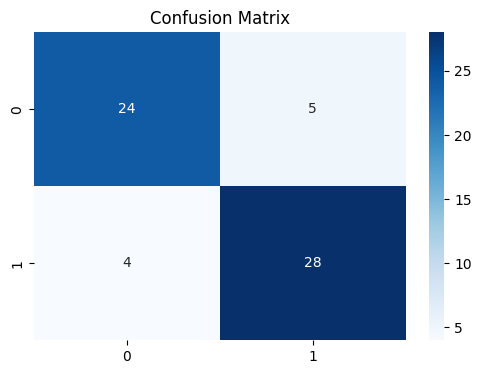

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y1_test , y1_pred) , annot = True , cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print(classification_report(y1_test , y1_pred))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## model_2_KNN

In [43]:
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3 )
knn.fit(x2_train, y2_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred2 = knn.predict(x2_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y2_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9180327868852459


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

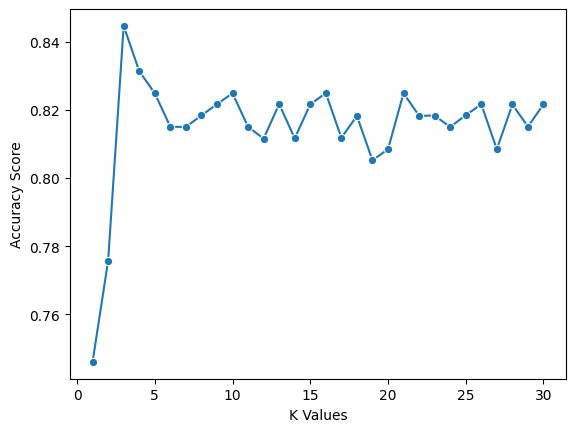

In [48]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [49]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x2_train, y2_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
y_pred_2 = knn.predict(x2_test)

accuracy = accuracy_score(y2_test, y_pred_2)
precision = precision_score(y2_test, y_pred_2)
recall = recall_score(y2_test, y_pred_2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9180327868852459
Precision: 0.9354838709677419
Recall: 0.90625


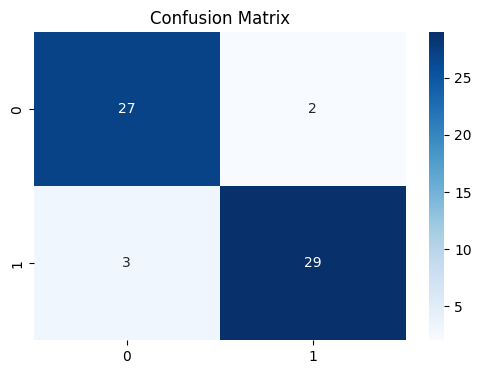

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y2_test , y_pred_2) , annot = True , cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

In [52]:
print(df['AHD'].value_counts())

AHD
0    164
1    139
Name: count, dtype: int64


## model_3

In [53]:
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC()
clf.fit(x3_train, y3_train)

# Make predictions on the test set
y_pred3 = clf.predict(x3_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y3_test, y_pred3)
accuracy

0.8688524590163934

In [55]:
print(classification_report(y3_test , y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## comparsion_model

Training Logistic Regression...
Evaluation completed for Logistic Regression
Training K-Nearest Neighbors...
Evaluation completed for K-Nearest Neighbors
Training SVM...
Evaluation completed for SVM
Training Decision Tree...
Evaluation completed for Decision Tree
Training Random Forest...
Evaluation completed for Random Forest
Training Gradient Boosting...
Evaluation completed for Gradient Boosting
Training Naive Bayes...
Evaluation completed for Naive Bayes
Results saved to 'model_results.txt'
Best Model: Random Forest


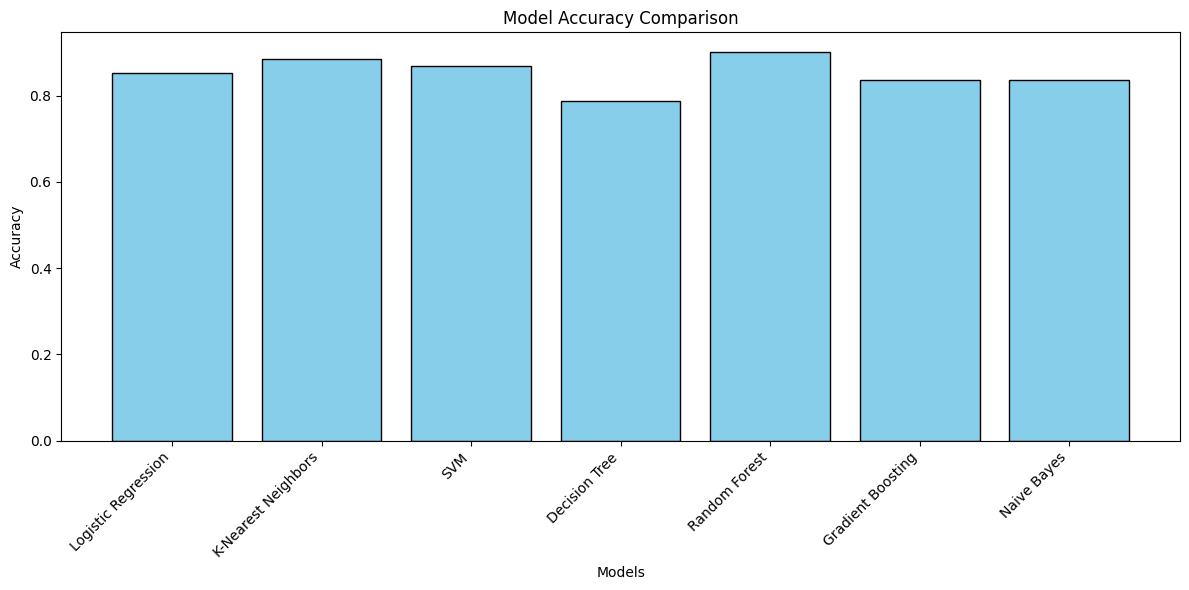

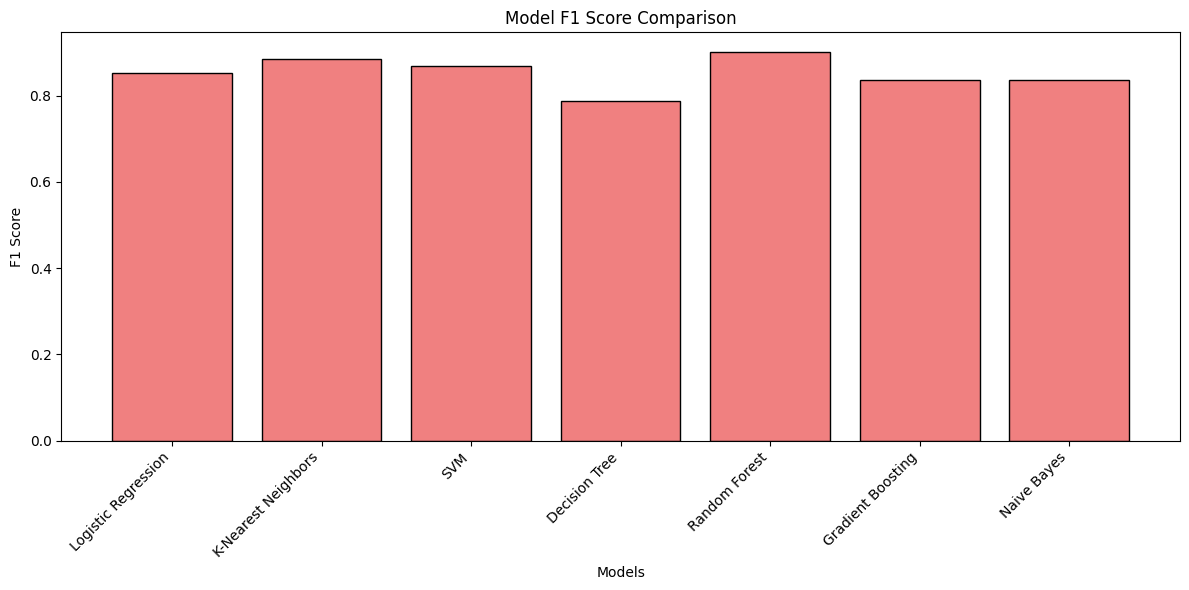

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
      'Naive Bayes': GaussianNB()
}


def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Evaluates a model and returns a dictionary of metrics and plot a confusion matrix.

    Args:
        model: The model to evaluate.
        X_train: Training data features.
        y_train: Training data labels.
        X_test: Testing data features.
        y_test: Testing data labels.
         model_name: The name of the model for saving the plot.
    Returns:
        A dictionary containing the model's score, accuracy, precision, recall, and F1 score.
        also returns the confusion matrix.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot = True , cmap = 'Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.savefig(f'confusion_matrix_{model_name}.png')
    plt.close()



    return {
        'score': model.score(X_train, y_train),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted',zero_division=0),
        'recall': recall_score(y_test, y_pred, average='weighted',zero_division=0),
        'f1_score': f1_score(y_test, y_pred, average='weighted'),
        'confusion_matrix': cm
    }

# Initialize an empty dictionary to store results of all models
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model_results = evaluate_model(model, X_train, y_train, X_test, y_test, name)
    results[name] = model_results
    print(f"Evaluation completed for {name}")


# Find the best model based on the highest accuracy
best_model = max(results, key=lambda k: results[k]['accuracy'])

# Save results to a text file
with open('model_results.txt', 'w') as f:
    for name, metrics in results.items():
        f.write(f"Model: {name}\n")
        f.write(f"  Training Score: {metrics['score']:.4f}\n")
        f.write(f"  Accuracy: {metrics['accuracy']:.4f}\n")
        f.write(f"  Precision: {metrics['precision']:.4f}\n")
        f.write(f"  Recall: {metrics['recall']:.4f}\n")
        f.write(f"  F1 Score: {metrics['f1_score']:.4f}\n")
        f.write(f"  Confusion Matrix: \n{metrics['confusion_matrix']}\n")
        f.write("-" * 30 + "\n")
    f.write(f"\nBest Model: {best_model} with Accuracy: {results[best_model]['accuracy']:.4f}\n")

print(f"Results saved to 'model_results.txt'")
print(f"Best Model: {best_model}")


# Plot Comparison of models
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
f1_scores = [results[name]['f1_score'] for name in model_names]

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
plt.show()


# Plotting f1 score
plt.figure(figsize=(12, 6))
plt.bar(model_names, f1_scores, color='lightcoral', edgecolor='black')
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Model F1 Score Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('model_f1_comparison.png')
plt.show()